# Datasets By-Year Publications Plot

Author: Patrik Goldschmidt (igoldschmidt@fit.vut.cz)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
import numpy as np

In [2]:
pubs = pd.DataFrame(data=[
    ['1999', 1, 0],
    ['2000', 2, 0],
    ['2001', 0, 1],
    ['2002', 0, 0],
    ['2003', 0, 0],
    ['2004', 0, 0],
    ['2005', 0, 0],
    ['2006', 0, 0],
    ['2007', 0, 0],
    ['2008', 0, 1],
    ['2009', 2, 1],
    ['2010', 0, 2],
    ['2011', 0, 3],
    ['2012', 1, 0],
    ['2013', 0, 0],
    ['2014', 0, 2],
    ['2015', 1, 1],
    ['2016', 0, 3],
    ['2017', 1, 5],
    ['2018', 1, 7],
    ['2019', 0, 3],
    ['2020', 1, 17],
    ['2021', 3, 9],
    ['2022', 1, 6],
    ['2023', 5, 9],
], columns=['year', 'general', 'special'])

pubs = pubs.set_index(pubs['year'])
pubs

,year,general,special
year,,,
1999,1999,1,0
2000,2000,2,0
2001,2001,0,1
2002,2002,0,0
2003,2003,0,0
2004,2004,0,0
2005,2005,0,0
2006,2006,0,0
2007,2007,0,0


In [3]:
# Sum to make sure that the data were transferred correcly
# Should be 89
pubs[['general', 'special']].sum().sum()

89

In [4]:
# Compute sum of the general and special datasets
pubs['sum'] = pubs['general'] + pubs['special']

In [5]:
pubs_displ = pubs.drop(labels=['2002', '2003', '2004', '2005', '2006', '2007'], errors='ignore')
pubs_displ.loc['2002-2007'] = ['2002-2007', 0, 0, 0]
pubs_displ = pubs_displ.sort_index(axis=0, ascending=True)
pubs_displ

,year,general,special,sum
year,,,,
1999,1999,1,0,1
2000,2000,2,0,2
2001,2001,0,1,1
2002-2007,2002-2007,0,0,0
2008,2008,0,1,1
2009,2009,2,1,3
2010,2010,0,2,2
2011,2011,0,3,3
2012,2012,1,0,1


In [6]:
#pubs_displ = pubs_displ.drop(labels=['2002-2007'])
#pubs_displ['year'] = pubs_displ['year'].astype(int)

Data are in the final form, ready to be plot.

In [15]:
# Create a polynomial fitting line for the trend line
trendline_coefs = np.polyfit(
    list(range(1, len(pubs_displ) + 1)),
    pubs_displ['sum'],
    deg=3)
tl_poly = np.poly1d(trendline_coefs)

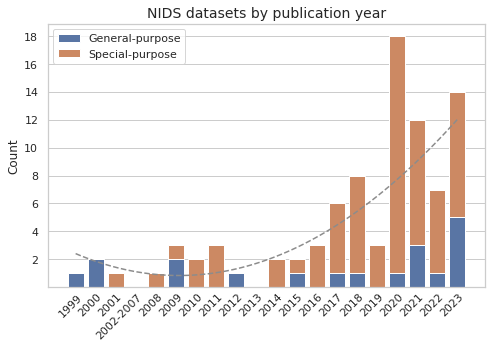

In [16]:
# Plot the stacked bar chart
sns.set_theme(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(7,5))

# Plot stacked barchart and
ax = sns.barplot(data=pubs_displ, x='year', y='general', color=sns.color_palette()[0], label='General-purpose')
ax = sns.barplot(data=pubs_displ, x='year', y='special', bottom=pubs_displ['general'], color=sns.color_palette()[1], label='Special-purpose')

# Plot trendline
x_vals = np.linspace(0, len(pubs_displ) - 1, 100)
ax.plot(x_vals, tl_poly(x_vals), color=sns.color_palette()[7], linewidth=1.5, linestyle='--')#, label='Trendline of Total Sum')

# Set Y axis ticks
plt.yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])
#plt.yticks([3, 6, 9, 12, 15, 18])

# Rotate X-axis tickers to make them not overallping
plt.xticks(rotation=45, horizontalalignment='right')

# Transform X-axis tickers a bit to the right (first) and up (second)
trans = mtrans.Affine2D().translate(8, 5)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform() + trans)

# Plot settings
plt.title("NIDS datasets by publication year", fontsize=14)
plt.xlabel('')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.tight_layout()

plt.savefig('datapublications.pdf')
plt.show()